## Is it a bear?

In [11]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -U duckduckgo_search
    !pip install fastai
    !pip install fastbook

     |████████████████████████████████| 75 kB 2.6 MB/s            
     |████████████████████████████████| 97 kB 5.8 MB/s             
     |████████████████████████████████| 7.3 MB 68.4 MB/s            
     |████████████████████████████████| 74 kB 2.5 MB/s             
     |████████████████████████████████| 57 kB 4.0 MB/s             
     |████████████████████████████████| 2.8 MB 81.2 MB/s            
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
  Attempting uninstall: click
    Found existing installation: click 8.0.3
    Uninstalling click-8.0.3:
      Successfully uninstalled click-8.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
spacy 3.2.3 requires typing-extensions<4.0.0.0,>=3.7.4; pyt

In 2015 the idea of creating a computer system that could recognise birds was considered so outrageously challenging that it was the basis of [this XKCD joke](https://xkcd.com/1425/):

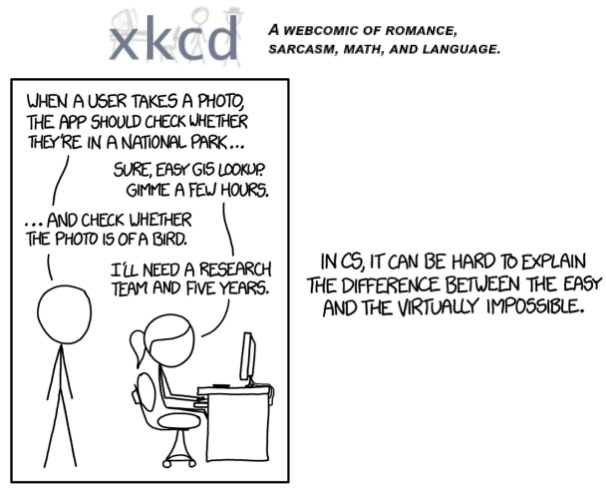

But today, we can do exactly that, in just a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use DuckDuckGo to search for images of "bird photos"
1. Use DuckDuckGo to search for images of "forest photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a bird and see if it works.

## Step 1: Download images of birds and non-birds

In [12]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))


Let's start by searching for a bird photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [15]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('bear photos', max_images=1)
urls[0]

Searching for 'bear photos'


'https://pixnio.com/free-images/2016/06/07/brown-bear-close-head-animal-mammal.jpg'

...and then download a URL and take a look at it:

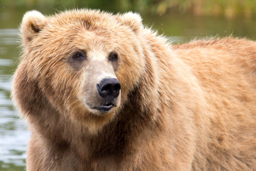

In [16]:
from fastdownload import download_url
dest = 'bear.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "forest photos":

Searching for 'forest photos'


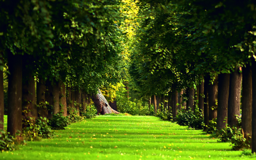

In [17]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "bird" and "forest" photos, and save each group of photos to a different folder (I'm also trying to grab a range of lighting conditions here):

In [18]:
searches = 'forest','bear'
path = Path('bear_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bear photo'
Searching for 'bear sun photo'
Searching for 'bear shade photo'


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [20]:
print(path)
searches = 'forest','bear'

for imageType in searches:
    print(imageType)
    content = os.listdir(path/imageType)
    for element in content:
        print(element)

bear_or_not
forest
5b76925e-2584-4c20-9046-bd29894a92c5.jpg
f3fbdfc4-75d8-4f29-903b-f319382d87a7.jpg
7861b2e2-2e89-4d51-a3b5-98905b54eb86.jpg
19b6f334-9423-4926-a554-7eea9aabf588.jpg
72f193c9-5aee-4541-b035-b4b32e285302.jpg
79a5b180-7a64-427e-b5c3-492378702b61.jpg
abb6dc90-1e7f-49b2-a780-7873de559ba6.jpg
fdf1c463-ccac-400c-959e-05d3cc3f1c07.jpg
5d421587-76a5-4ab1-bc07-0397260be8ff.png
ce7ca6a2-875f-4e4e-95d2-2be45ee20277.jpg
740e9440-fc1a-474e-bdb9-ee0509625b93.jpg
ae8c5d60-14fa-4616-82ca-0182885a4472.jpg
f56058e9-7b66-4407-aa10-d8461b231230.jpeg
6ff16d20-7f00-48a0-9b15-af5f351fc6c2.jpg
480aab04-b3ac-4819-8632-af809a317b09.jpg!d
ada59617-272a-4249-8a05-22c475c336af.jpg
36fc4f03-7ab9-46c1-b760-a9bcc1929164.jpg
0a96aab3-2850-424f-8a70-e96a3ee5ea8b.jpg
5aa7789f-cbfa-4467-a594-1675e284a0d6.jpg
9f39dedd-3917-4c87-9594-0e5dd987304b.jpg
b3070cf6-a26f-4421-9522-d41714ab0d79.jpg
44a31277-1fe4-4bc3-9563-7b567ea63848.jpg
2a2c7dc4-8844-4614-8d1a-367daf99cee4.jpg
a008f269-3e8f-40f0-b6ee-e68603a2daf

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [22]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

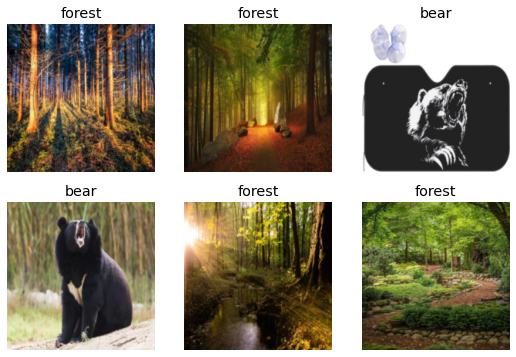

In [24]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.040512,1.079747,0.393939,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.077861,0.100373,0.060606,00:01
1,0.048228,0.164920,0.030303,00:01
2,0.033660,0.225638,0.030303,00:01


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that bird we downloaded at the start:

In [26]:
is_bear,_,probs = learn.predict(PILImage.create('bear.jpg'))
print(f"This is a: {is_bear}.")
print(f"Probability it's a bear: {probs[0]:.4f}")

This is a: bear.
Probability it's a bear: 1.0000


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.